## Notebook Setup 
The following cell will install Drake, checkout the underactuated repository, and set up the path (only if necessary).
- On Google's Colaboratory, this **will take approximately two minutes** on the first time it runs (to provision the machine), but should only need to reinstall once every 12 hours.  Colab will ask you to "Reset all runtimes"; say no to save yourself the reinstall.
- On Binder, the machines should already be provisioned by the time you can run this; it should return (almost) instantly.

More details are available [here](http://underactuated.mit.edu/drake.html).

In [1]:
try:
  import pydrake
  import underactuated
except ImportError:
  !curl -s https://raw.githubusercontent.com/RussTedrake/underactuated/master/scripts/setup/jupyter_setup.py > jupyter_setup.py
  from jupyter_setup import setup_underactuated
  setup_underactuated()

## Basic simulation

The acrobot is a core example in Drake.  We could certainly load it from a .urdf file, but Drake offers an Acrobot implementation that makes it convenient to manipulate the parameters (and visualize the system with different parameters).

<IPython.core.display.Javascript object>


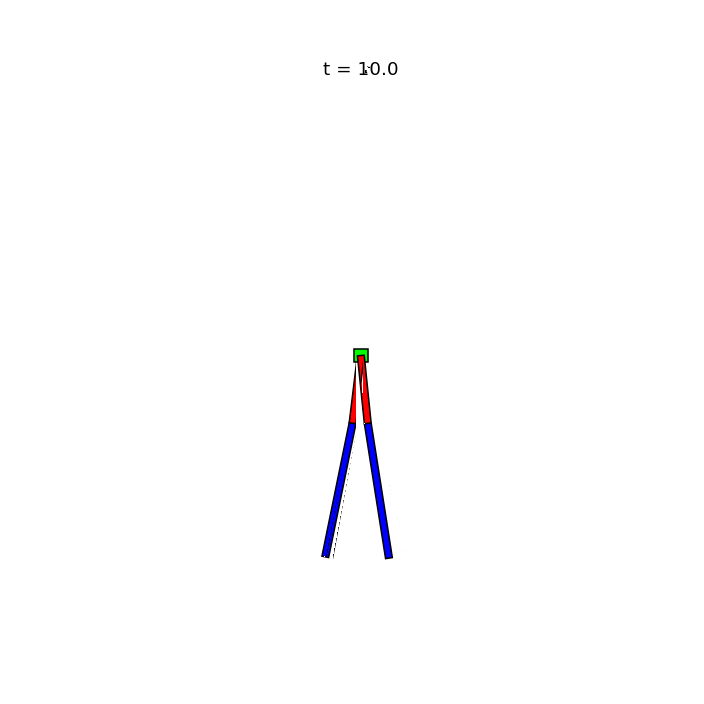

In [2]:
from IPython import get_ipython
import matplotlib.pyplot as plt
import numpy as np

from pydrake.all import ConstantVectorSource, DiagramBuilder, PlanarSceneGraphVisualizer, SceneGraph, Simulator
from pydrake.examples.acrobot import AcrobotGeometry, AcrobotPlant
from underactuated.jupyter import AdvanceToAndVisualize, SetupMatplotlibBackend
plt_is_interactive = SetupMatplotlibBackend()

builder = DiagramBuilder()
acrobot = builder.AddSystem(AcrobotPlant())

# Set the constant torque (you can change the value here if you like)
torque_system = builder.AddSystem(ConstantVectorSource([0.]))
builder.Connect(torque_system.get_output_port(0), acrobot.get_input_port(0))

# Setup visualization
scene_graph = builder.AddSystem(SceneGraph())
AcrobotGeometry.AddToBuilder(builder, acrobot.get_output_port(0), scene_graph)
visualizer = builder.AddSystem(
    PlanarSceneGraphVisualizer(scene_graph, xlim=[-4., 4.], ylim=[-4., 4.], show=plt_is_interactive))
builder.Connect(scene_graph.get_pose_bundle_output_port(),
                visualizer.get_input_port(0))

diagram = builder.Build()

# Set up a simulator to run this diagram
simulator = Simulator(diagram)
context = simulator.get_mutable_context()


After running the cell above, you should see an interactive slider that will control the torque.  Executing the cell below will use the value of that torque as the control input to the pendulum.  Give it a spin!

*Note:* If you are running on a system that supports interactive graphics (e.g. a local machine or Binder), then you should see the simulation "live", and immediately see the results of changing the slider.  On Colab, however, you only get to see the results of the simulation as a movie after it's run.  [More information.](http://underactuated.mit.edu/drake.html)

In [4]:
# Simulate
duration = 10.0 if get_ipython() else 0.1 # sets a shorter duration during testing
context.SetTime(0.0)
context.SetContinuousState(np.random.randn(4,1))

AdvanceToAndVisualize(simulator, visualizer, duration)

[2020-11-18 23:25:08.889] [console] [warning] Simulation time has changed since last Initialize() or AdvanceTo(). Resetting simulation time requires a call to Initialize(). This warning will become a hard error on or after 2020-12-01.
